In [21]:
# create a dataset using make_regression
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [23]:
X.shape

(100, 1)

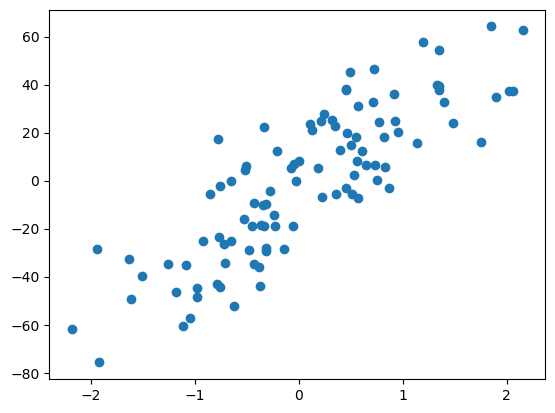

In [24]:
plt.scatter(X, y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [26]:
print(X_train.shape)
print(X_test.shape)

(80, 1)
(20, 1)


In [27]:
# Model Training:  the value of slope and intercept using OLS method is m=27.82 and b= -2.29 
lr= LinearRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [28]:
# Model Testing: Predict y using m and b for X_test and find accuracy
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.635782750634568

In [31]:
y_pred.shape

(20,)

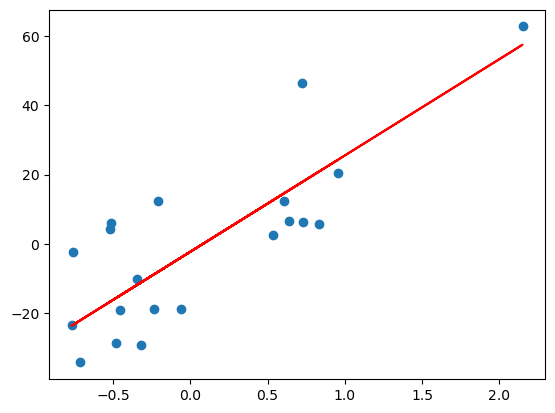

In [34]:

plt.scatter(X_test,y_test)
# plt.plot(X,y,color='red')
plt.plot(X_test,y_pred,color='red')

# Using GD 

In [35]:
# start with ransom values of m and b
# The numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        for i in range(self.epochs):
#             find slopes
            slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b) 
            slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
#         update weights
            self.b = self.b - (self.lr * slope_b)
            self.m = self.m - (self.lr * slope_m)
# print final updated values of m and b after n epochs
        print(self.m,self.b)
    
    def predict(self,X):
        return self.m * X + self.b         
            

In [36]:
gd = GDRegressor(0.001,50)

In [37]:
gd.fit(X_train,y_train)

28.159367347119062 -2.300457419682486


In [38]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.6343842836315579

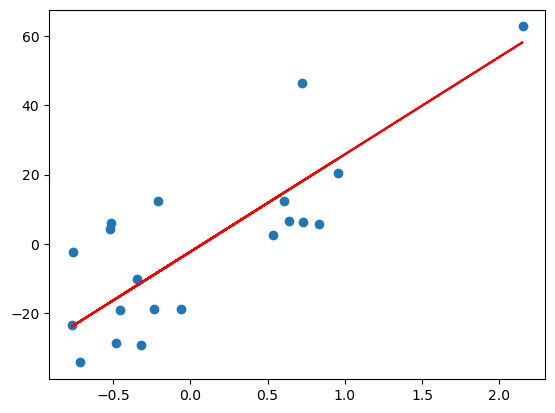

In [39]:
plt.scatter(X_test,y_test)
# plt.plot(X,y,color='red')
plt.plot(X_test,y_pred,color='red')

# Step by step visulaization for 4 data points - Linear Regression problem

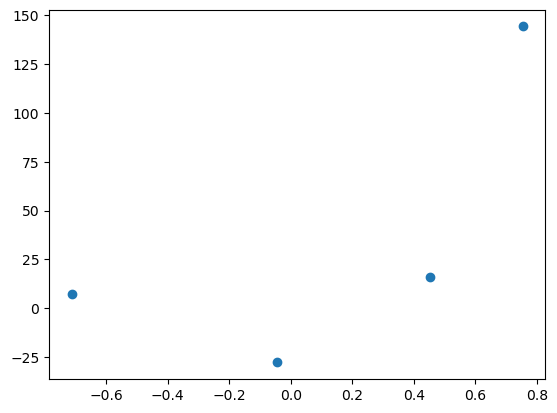

In [41]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)
plt.scatter(X,y)

In [42]:

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [44]:

print(reg.coef_)
print(reg.intercept_)


[78.35063668]
26.15963284313262


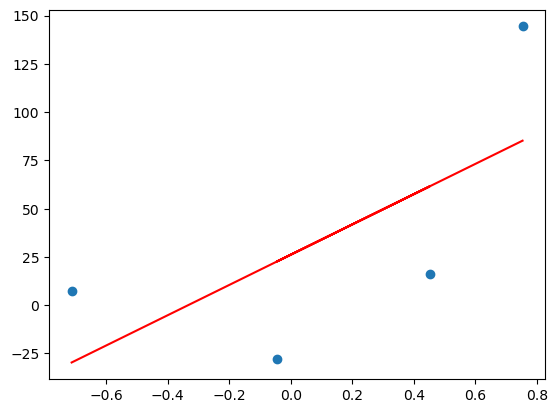

In [47]:

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')
# plt.plot(X,y,color='red')

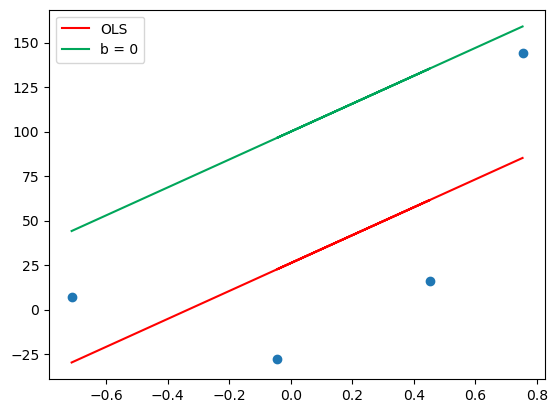

In [48]:

# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
# plot the line assuming b=0 and m= 78.35
y_pred = ((78.35 * X) + 100).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [49]:
# optimize m and b and plot again
# Iteration-1

m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

590.7223659179078

In [50]:

# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size
     

59.072236591790784

In [51]:

# Calculating the new intercept
b = b - step_size
b

40.927763408209216

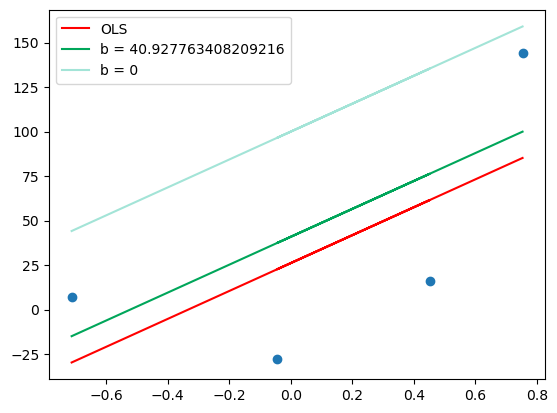

In [52]:

y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [53]:

# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

118.14447318358157

In [54]:

step_size = loss_slope*lr
step_size
     

11.814447318358157

In [55]:

b = b - step_size
b
     

29.11331608985106

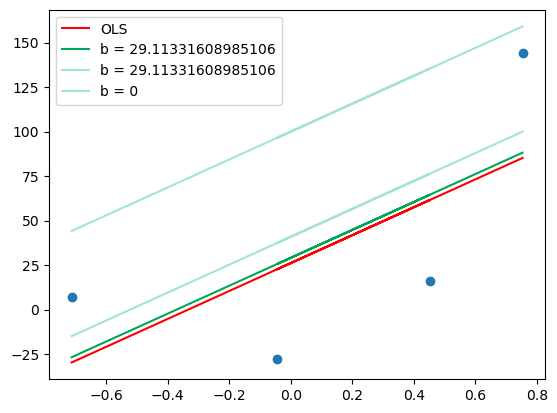

In [56]:

y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [57]:

# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

23.62889463671631

In [58]:

step_size = loss_slope*lr
step_size

2.3628894636716313

In [59]:
b = b - step_size
b
   

26.75042662617943

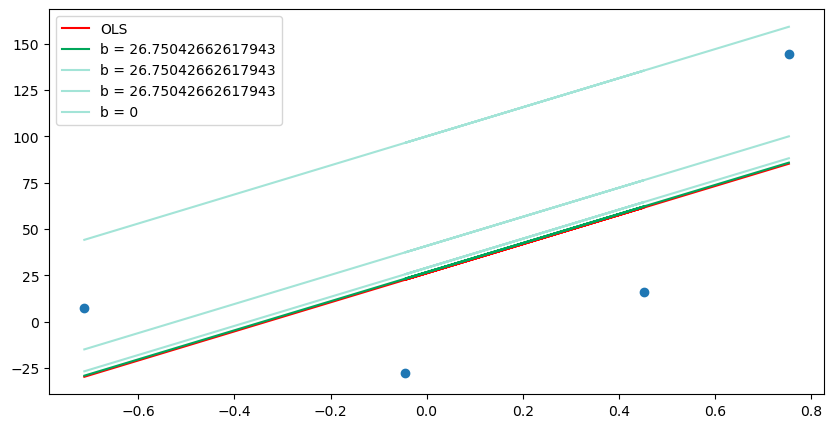

In [63]:

y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

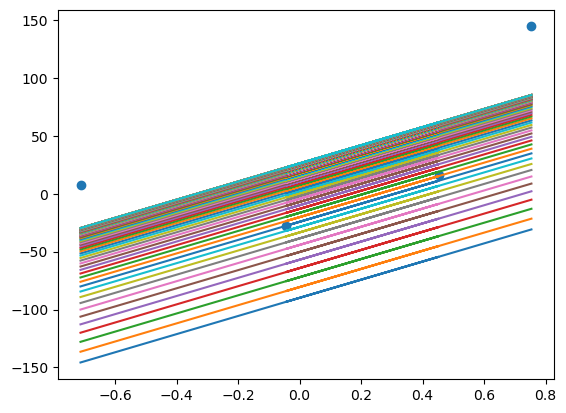

In [64]:

b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)
    y_pred = m * X + b
    plt.plot(X,y_pred)
    
plt.scatter(X,y)